In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
benef = pd.read_csv('./data/Train_Beneficiary.csv')
inpat = pd.read_csv('./data/Train_Inpatient.csv')
outpat = pd.read_csv('./data/Train_Outpatient.csv')
fraud = pd.read_csv('./data/Train-Potential Fraud.csv')

## Warm-up Question 4

### Part 4A : Study the distribution of InscClaimAmtReimbursed, DeductibleAmtPaid for both inpatient and outpatient services

In [3]:
inpat1 = inpat.copy()
outpat1 = outpat.copy()

In [4]:
outpat_deduct = outpat1['DeductibleAmtPaid']. \
value_counts().reset_index()

inpat_deduct = inpat1['DeductibleAmtPaid']. \
value_counts().reset_index()

In [8]:
outpat_deduct.rename(columns={'index':'DeductAmtPaid',\
                              'DeductibleAmtPaid':'Frequency'}, \
                     inplace=True)

inpat_deduct.rename(columns={'index':'DeductAmtPaid',\
                              'DeductibleAmtPaid':'Frequency'}, \
                    inplace=True)

Text(0.5, 1.0, 'Outpatient Deductible Amount Paid Distribution')

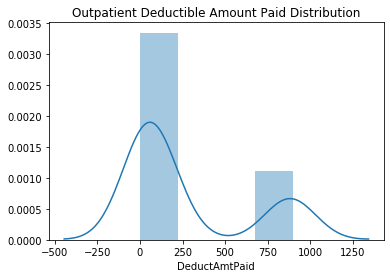

In [14]:
sns.distplot(outpat_deduct['DeductAmtPaid']).set_title \
('Outpatient Deductible Amount Paid Distribution')

Text(0.5, 1.0, 'Inpatient Deductible Amount Paid Distribution')

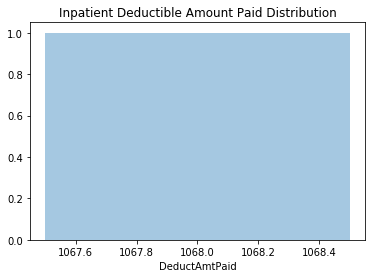

In [15]:
sns.distplot(inpat_deduct['DeductAmtPaid']).set_title \
('Inpatient Deductible Amount Paid Distribution')

In [16]:
outpat_deduct["FrequencyLog"] = np.log(outpat_deduct['Frequency'])

inpat_deduct["FrequencyLog"] = np.log(inpat_deduct['Frequency'])

In [17]:
outpat_deduct_freq = outpat_deduct[['DeductAmtPaid','FrequencyLog']]

inpat_deduct_freq = inpat_deduct[['DeductAmtPaid','FrequencyLog']]

In [20]:
inpat_outpat_deduct = pd.concat([outpat_deduct_freq.assign \
                             (Legend='Outpatient'), \
                             inpat_deduct_freq. \
                             assign(Legend='Inpatient')])

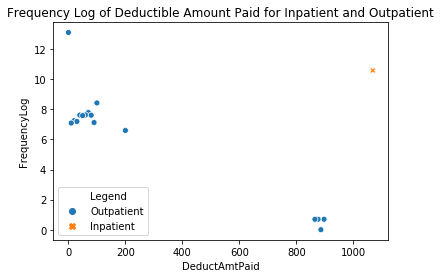

In [22]:
sns.scatterplot(x='DeductAmtPaid', y='FrequencyLog', \
                data=inpat_outpat_deduct,
                hue='Legend', style='Legend').set_title \
('Frequency Log of Deductible Amount Paid for Inpatient and Outpatient')
plt.show()

In [27]:
outpat_reimb = outpat1['InscClaimAmtReimbursed']. \
value_counts().reset_index()

inpat_reimb = inpat1['InscClaimAmtReimbursed']. \
value_counts().reset_index()

In [29]:
outpat_reimb.rename(columns={'index':'AmtReimbursed',\
                              'InscClaimAmtReimbursed':'Frequency'}, \
                     inplace=True)

inpat_reimb.rename(columns={'index':'AmtReimbursed',\
                              'InscClaimAmtReimbursed':'Frequency'}, \
                    inplace=True)

Text(0.5, 1.0, 'Outpatient: Distribution of Insurance Claim Amount Reimbursed')

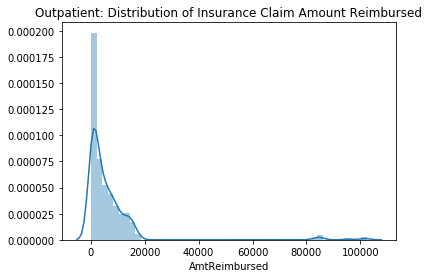

In [30]:
sns.distplot(outpat_reimb['AmtReimbursed']).set_title \
('Outpatient: Distribution of Insurance Claim Amount Reimbursed')

Text(0.5, 1.0, 'Inpatient: Distribution of Insurance Claim Amount Reimbursed')

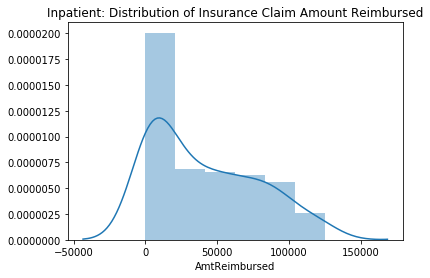

In [31]:
sns.distplot(inpat_reimb['AmtReimbursed']).set_title \
('Inpatient: Distribution of Insurance Claim Amount Reimbursed')

In [32]:
outpat_reimb["FrequencyLog"] = np.log(outpat_reimb['Frequency'])

inpat_reimb["FrequencyLog"] = np.log(inpat_reimb['Frequency'])

In [33]:
outpat_reimb_freq = outpat_reimb[['AmtReimbursed','FrequencyLog']]

inpat_reimb_freq = inpat_reimb[['AmtReimbursed','FrequencyLog']]

In [34]:
inpat_outpat_reimb = pd.concat([outpat_reimb_freq.assign \
                             (Legend='Outpatient'), \
                             inpat_reimb_freq. \
                             assign(Legend='Inpatient')])

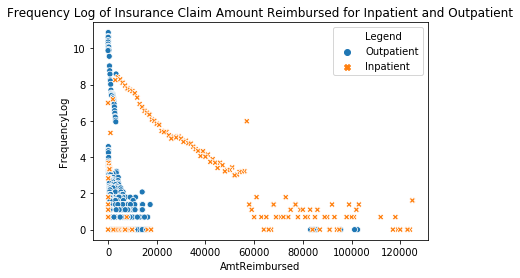

In [35]:
sns.scatterplot(x='AmtReimbursed', y='FrequencyLog', \
                data=inpat_outpat_reimb,
                hue='Legend', style='Legend').set_title \
('Frequency Log of Insurance Claim Amount Reimbursed for \
Inpatient and Outpatient')
plt.show()

In [ ]:
print(outpat1['DeductibleAmtPaid'].mean())
print(inpat1['DeductibleAmtPaid'].mean())
print(outpat1['InscClaimAmtReimbursed'].mean())
print(inpat1['InscClaimAmtReimbursed'].mean())

In [37]:
data = [['Outpatient Deductible Paid',2.78], \
        ['Inpatient Deductible Paid',1068], \
        ['Outpatient Reimbursed Amount',286], \
        ['Inpatient Reimbursed Amount',10088]]
inout_deductreimb_mean = pd.DataFrame(data, columns = ['Type of Patient \
and Payment', 'Deductible Paid/Insurance Reimbursed Mean'])

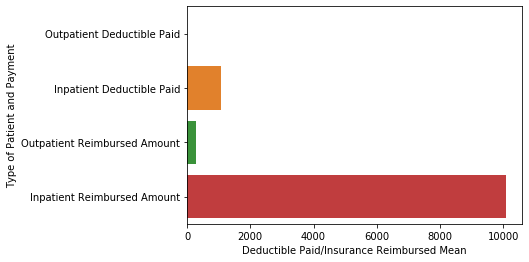

In [38]:
sns.barplot(x=inout_deductreimb_mean['Deductible Paid/Insurance Reimbursed Mean'], \
            y=inout_deductreimb_mean['Type of Patient and Payment'], \
            data=inout_deductreimb_mean)

### Part 4B : Study the distributions of insurance covered percentages InscClaimAmtReimbursed/(InscClaimAmtReimbursed + DeductibleAmtPaid)

In [39]:
outpat1['insur_covered_percent'] = outpat1['InscClaimAmtReimbursed']/ \
(outpat1['InscClaimAmtReimbursed'] + outpat1['DeductibleAmtPaid'])

In [40]:
inpat1['insur_covered_percent'] = inpat1['InscClaimAmtReimbursed']/ \
(inpat1['InscClaimAmtReimbursed'] + inpat1['DeductibleAmtPaid'])

In [ ]:
outpat1['insur_covered_percent'].mean()
inpat1['insur_covered_percent'].mean()

In [41]:
data2 = [['Outpatient',0.98],['Inpatient',0.83]]
insur_covered_percent = pd.DataFrame(data2, columns = \
                                     ['Type of Patient',\
                                      'Insurance Covered Percentages Mean'])

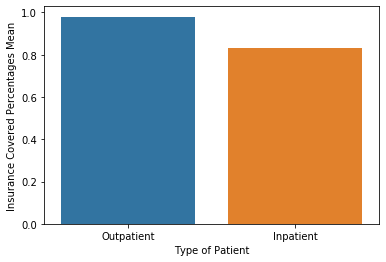

In [42]:
sns.barplot(x=insur_covered_percent['Type of Patient'],\
            y=insur_covered_percent['Insurance Covered Percentages Mean'],\
            data=insur_covered_percent)

In [43]:
outpat_covered = outpat1['insur_covered_percent']. \
value_counts().reset_index()

inpat_covered = inpat1['insur_covered_percent']. \
value_counts().reset_index()

In [48]:
outpat_covered.rename(columns={'index':'Insurace Covered Percentage',\
                              'insur_covered_percent':'Frequency'}, \
                     inplace=True)

inpat_covered.rename(columns={'index':'Insurace Covered Percentage',\
                              'insur_covered_percent':'Frequency'}, \
                    inplace=True)

Text(0.5, 1.0, 'Outpatient Insurance Covered Percentage Distribution')

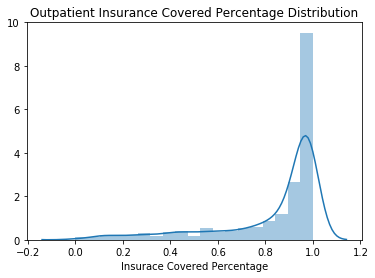

In [49]:
sns.distplot(outpat_covered['Insurace Covered Percentage']).set_title \
('Outpatient Insurance Covered Percentage Distribution')

Text(0.5, 1.0, 'Inpatient Insurance Covered Percentage Distribution')

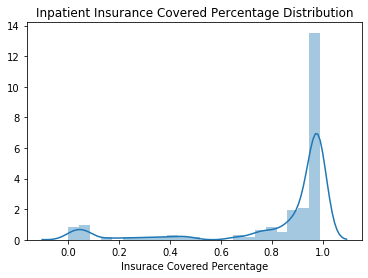

In [50]:
sns.distplot(inpat_covered['Insurace Covered Percentage']).set_title \
('Inpatient Insurance Covered Percentage Distribution')

In [52]:
outpat_covered["FrequencyLog"] = np.log(outpat_covered['Frequency'])

inpat_covered["FrequencyLog"] = np.log(inpat_covered['Frequency'])

outpat_covered_freq = outpat_covered[['Insurace Covered Percentage','FrequencyLog']]

inpat_covered_freq = inpat_covered[['Insurace Covered Percentage','FrequencyLog']]

In [53]:
inpat_outpat_covered = pd.concat([outpat_covered_freq.assign \
                             (Legend='Outpatient'), \
                             inpat_covered_freq. \
                             assign(Legend='Inpatient')])

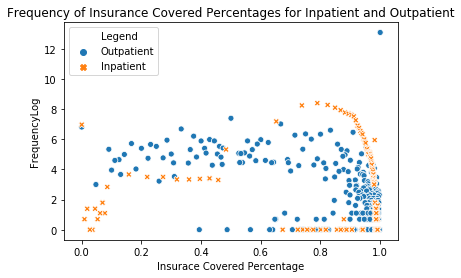

In [54]:
sns.scatterplot(x='Insurace Covered Percentage', y='FrequencyLog', \
                data=inpat_outpat_covered,
                hue='Legend', style='Legend').set_title \
('Frequency of Insurance Covered Percentages for \
Inpatient and Outpatient')
plt.show()

### Part 4C : Study the distributions of the durations of average insurance claims (end-start) of the providers. Box-plot/violin-plot based on the Potential Fraud Flag. Do you find any differences for non-potential fraud vs. potential-fraud providers?

In [56]:
outpat1['ClaimStartDt'] = pd.to_datetime(outpat1['ClaimStartDt'])
outpat1['ClaimEndDt'] = pd.to_datetime(outpat1['ClaimEndDt'])
outpat1['ServiceDays'] = outpat1['ClaimEndDt'] - outpat1['ClaimStartDt']

In [57]:
inpat1['ClaimStartDt'] = pd.to_datetime(inpat1['ClaimStartDt'])
inpat1['ClaimEndDt'] = pd.to_datetime(inpat1['ClaimEndDt'])
inpat1['ServiceDays'] = inpat1['ClaimEndDt'] - inpat1['ClaimStartDt']

In [60]:
outpat1['ServiceDays'] = outpat1['ServiceDays'].astype(str)
outpat1['ServiceDays'] = outpat1['ServiceDays'].str.replace('days', ' ')

In [62]:
outpat1['ServiceDays'] = outpat1['ServiceDays']. \
str.replace('00:00:00.000000000', '')

outpat1['ServiceDays'] = outpat1['ServiceDays'].astype(int)

outpat1['ServiceDays'] = outpat1['ServiceDays'] + 1

In [75]:
provider_service = outpat1.groupby('Provider')['ServiceDays']. \
mean().reset_index()

Text(0.5, 1.0, 'Outpatient: Distribution of Mean Service Days by Provider')

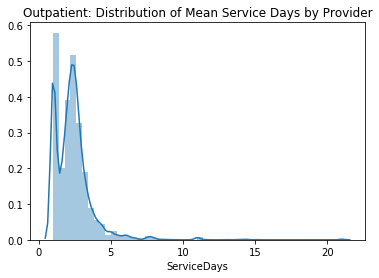

In [97]:
sns.distplot(provider_service['ServiceDays']).set_title \
('Outpatient: Distribution of Mean Service Days by Provider')

Text(0.5, 1.0, 'Inpatient: Distribution of Mean Service Days by Provider')

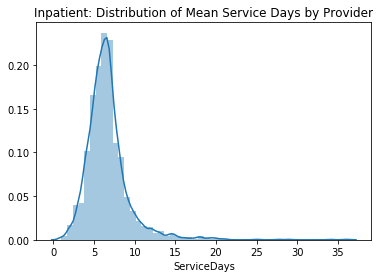

In [98]:
provider_service2 = inpat1.groupby('Provider')['ServiceDays']. \
mean().reset_index()

sns.distplot(provider_service2['ServiceDays']).set_title \
('Inpatient: Distribution of Mean Service Days by Provider')

In [79]:
outpat_provider_days = outpat1[['Provider','ServiceDays']]

In [80]:
outpat_days_fraud = pd.merge(fraud, outpat_provider_days, on='Provider')

Text(0.5, 1.0, 'Outpatient:Durations of Average Insurance Claims by Non and Potential Fraudulent Providers')

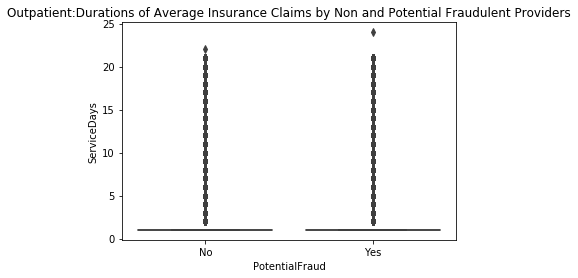

In [101]:
sns.boxplot(x='PotentialFraud', y='ServiceDays', \
            data=outpat_days_fraud).set_title\
('Outpatient:Durations of Average Insurance Claims \
by Non and Potential Fraudulent Providers')

In [85]:
days_log1 = np.log(outpat_days_fraud['ServiceDays'])

Text(0.5, 1.0, 'Outpatient:Log Durations of Average Insurance Claims by Non and Potential Fraudulent Providers')

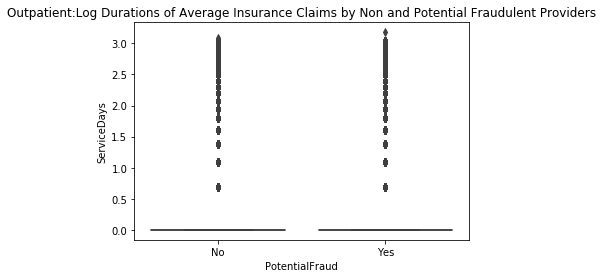

In [102]:
sns.boxplot(x='PotentialFraud', y=days_log1, data=outpat_days_fraud). \
set_title\
('Outpatient:Log Durations of Average Insurance Claims \
by Non and Potential Fraudulent Providers')

Text(0.5, 1.0, 'Outpatient:Durations of Average Insurance Claims by Non and Potential Fraudulent Providers')

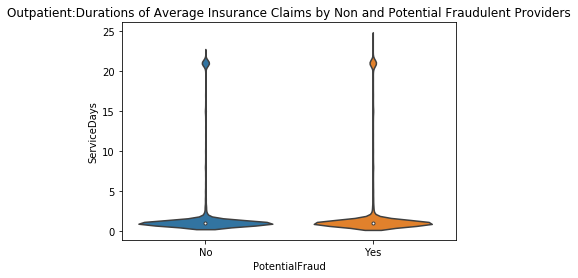

In [103]:
sns.violinplot(x='PotentialFraud', y='ServiceDays', \
               data=outpat_days_fraud).set_title\
('Outpatient:Durations of Average Insurance Claims \
by Non and Potential Fraudulent Providers')

In [89]:
inpat1['ServiceDays'] = inpat1['ServiceDays'].astype(str)
inpat1['ServiceDays'] = inpat1['ServiceDays'].str.replace('days', ' ')

inpat1['ServiceDays'] = inpat1['ServiceDays']. \
str.replace('00:00:00.000000000', '')

inpat1['ServiceDays'] = inpat1['ServiceDays'].astype(int)

inpat1['ServiceDays'] = inpat1['ServiceDays'] + 1

In [90]:
inpat_provider_days = inpat1[['Provider','ServiceDays']]

inpat_days_fraud = pd.merge(fraud, inpat_provider_days, on='Provider')

Text(0.5, 1.0, 'Inpatient:Durations of Average Insurance Claims by Non and Potential Fraudulent Providers')

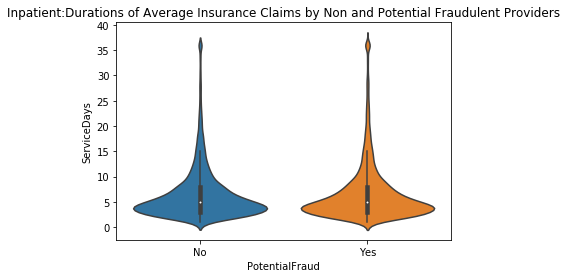

In [104]:
sns.violinplot(x='PotentialFraud', y='ServiceDays', \
               data=inpat_days_fraud).set_title\
('Inpatient:Durations of Average Insurance Claims \
by Non and Potential Fraudulent Providers')

Text(0.5, 1.0, 'Inpatient:Durations of Average Insurance Claims by Non and Potential Fraudulent Providers')

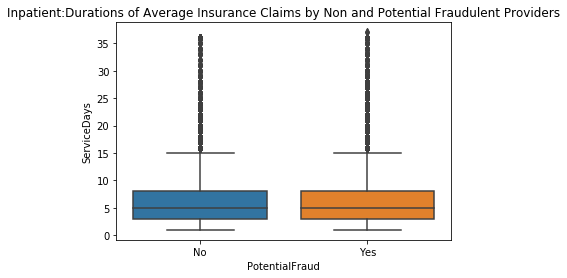

In [105]:
sns.boxplot(x='PotentialFraud', y='ServiceDays', \
            data=inpat_days_fraud).set_title\
('Inpatient:Durations of Average Insurance Claims \
by Non and Potential Fraudulent Providers')

In [96]:
print(outpat_days_fraud.groupby('PotentialFraud')['ServiceDays'].mean()\
      .sort_values(ascending=False))

PotentialFraud
Yes    2.433551
No     2.413022
Name: ServiceDays, dtype: float64


In [95]:
print(inpat_days_fraud.groupby('PotentialFraud')['ServiceDays'].mean()\
      .sort_values(ascending=False))

PotentialFraud
Yes    6.737886
No     6.553831
Name: ServiceDays, dtype: float64


In [106]:
data3 = [['Outpat Pot Fraud',2.43],['Outpat Non-Pot Fraud',2.41], \
         ['Inpat Pot Fraud',6.74],['Inpat Non-Pot Fraud',6.55]]

servicedays_inoutpat_fraud = pd.DataFrame(data3, columns = \
                                     ['Type of Provider',\
                                      'Mean Duration of Average Insurance Claims'])

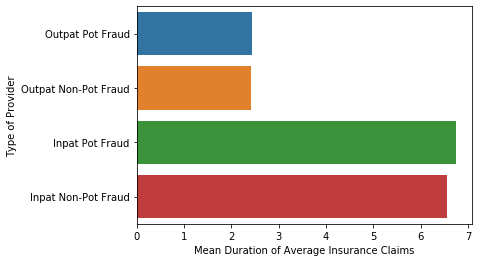

In [108]:
sns.barplot(x=servicedays_inoutpat_fraud['Mean Duration of Average Insurance Claims'],\
            y=servicedays_inoutpat_fraud['Type of Provider'],\
            data=servicedays_inoutpat_fraud)

### Part 4D : How are the service durations related to the total claim amounts, i.e. InscClaimAmtReimbursed+DeductibleAmtPaid?

In [110]:
outpat1['Total Claim Amounts'] = outpat1['InscClaimAmtReimbursed'] + \
outpat1['DeductibleAmtPaid']

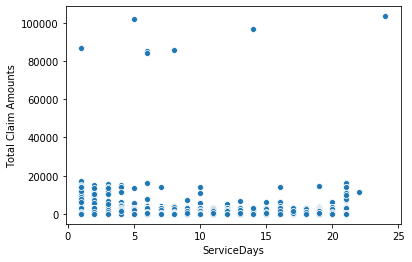

In [111]:
sns.scatterplot(x=outpat1['ServiceDays'], \
                y=outpat1['Total Claim Amounts'], data=outpat1)

In [113]:
y1 = np.log10(outpat1['Total Claim Amounts'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


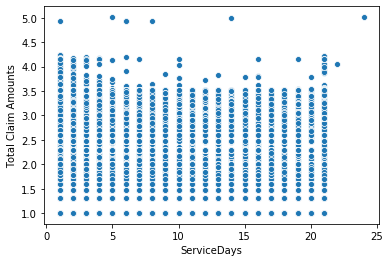

In [114]:
sns.scatterplot(x=outpat1['ServiceDays'], \
                y=y1, data=outpat1)

In [118]:
outpat_days_totalclaims=outpat1.groupby('ServiceDays')['Total Claim Amounts'].mean()\
      .sort_values(ascending=False).reset_index()

In [121]:
outpat_days_totalclaims['Claim_log'] = np.log10 \
(outpat_days_totalclaims['Total Claim Amounts'])

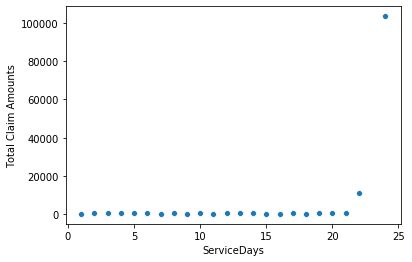

In [120]:
sns.scatterplot(x=outpat_days_totalclaims['ServiceDays'], \
                y=outpat_days_totalclaims['Total Claim Amounts'], \
                data=outpat_days_totalclaims)

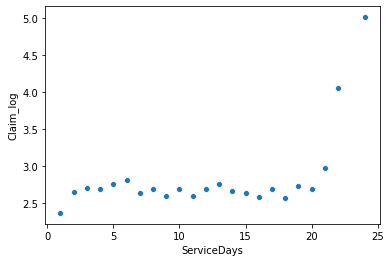

In [122]:
sns.scatterplot(x=outpat_days_totalclaims['ServiceDays'], \
                y=outpat_days_totalclaims['Claim_log'], \
                data=outpat_days_totalclaims)

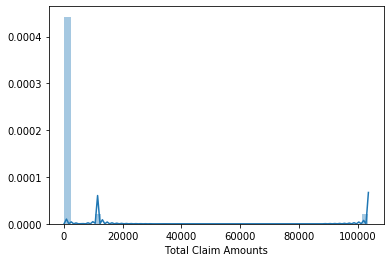

In [125]:
sns.distplot(outpat_days_totalclaims['Total Claim Amounts'])

In [126]:
inpat1['Total Claim Amounts'] = inpat1['InscClaimAmtReimbursed'] + \
inpat1['DeductibleAmtPaid']

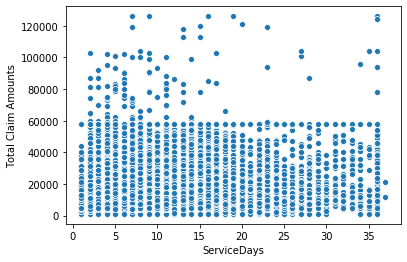

In [127]:
sns.scatterplot(x=inpat1['ServiceDays'], \
                y=inpat1['Total Claim Amounts'], data=inpat1)

In [128]:
inpat_days_totalclaims=inpat1.groupby('ServiceDays')['Total Claim Amounts'].mean()\
      .sort_values(ascending=False).reset_index()

In [130]:
inpat_days_totalclaims['Claim_log'] = np.log10 \
(inpat_days_totalclaims['Total Claim Amounts'])

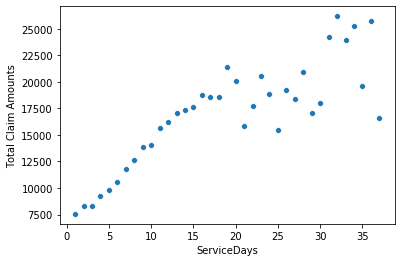

In [129]:
sns.scatterplot(x=inpat_days_totalclaims['ServiceDays'], \
                y=inpat_days_totalclaims['Total Claim Amounts'], \
                data=inpat_days_totalclaims)

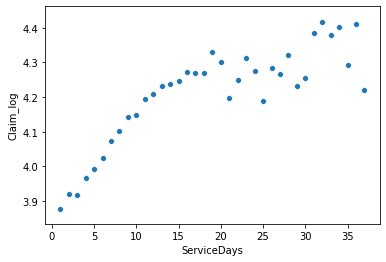

In [131]:
sns.scatterplot(x=inpat_days_totalclaims['ServiceDays'], \
                y=inpat_days_totalclaims['Claim_log'], \
                data=inpat_days_totalclaims)

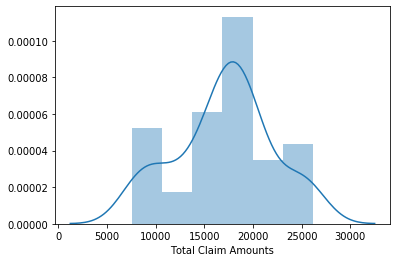

In [132]:
sns.distplot(inpat_days_totalclaims['Total Claim Amounts'])

### Part 4E : Consider mean daily total charges (i.e. total charge/duration), please describe their distribution. How does the potential fraud flag affect the distribution patterns? 

In [133]:
outpat1['Mean Daily Total Charges'] = outpat1['Total Claim Amounts'] / \
outpat1['ServiceDays']

Text(0.5, 1.0, 'Outpatient: Mean Daily Total Charges Distribution')

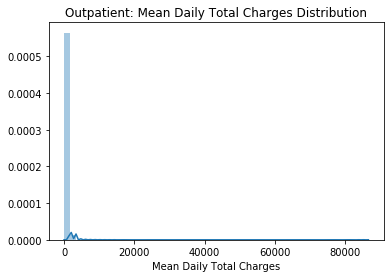

In [161]:
sns.distplot(outpat1['Mean Daily Total Charges']). \
set_title('Outpatient: Mean Daily Total Charges Distribution')

In [135]:
inpat1['Mean Daily Total Charges'] = inpat1['Total Claim Amounts'] / \
inpat1['ServiceDays']

In [153]:
inpat_daily_total = inpat1[['Mean Daily Total Charges']]

inpat_daily_total = inpat_daily_total.dropna()

Text(0.5, 1.0, 'Inpatient: Mean Daily Total Charges Distribution')

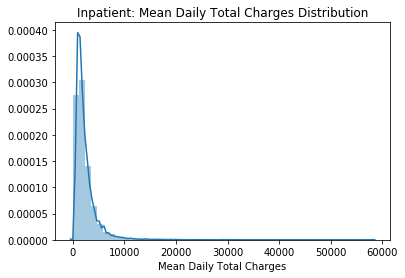

In [160]:
sns.distplot(inpat_daily_total['Mean Daily Total Charges']). \
set_title('Inpatient: Mean Daily Total Charges Distribution')

In [144]:
outpat_provider_meantotalcharges = outpat1[['Provider', \
                                            'Mean Daily Total Charges']]

In [145]:
outpat_meantotal_fraud = pd.merge(fraud, \
                                  outpat_provider_meantotalcharges, \
                                  on='Provider')

Text(0.5, 1.0, 'Outpatient:Mean Total Charges and Potential Fraud')

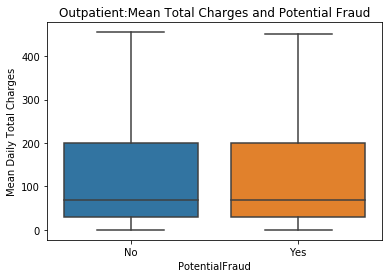

In [172]:
sns.boxplot(x='PotentialFraud', y='Mean Daily Total Charges', showfliers=False, \
            data=outpat_meantotal_fraud).set_title\
('Outpatient:Mean Total Charges and Potential Fraud')

Text(0.5, 1.0, 'Outpatient:Mean Total Charges and Potential Fraud')

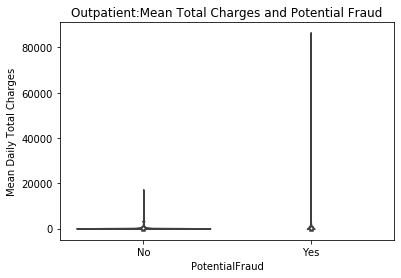

In [173]:
sns.violinplot(x='PotentialFraud', y='Mean Daily Total Charges', showfliers=False,\
               data=outpat_meantotal_fraud).set_title\
('Outpatient:Mean Total Charges and Potential Fraud')

In [148]:
log_mean = np.log10(outpat_meantotal_fraud['Mean Daily Total Charges'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Outpatient:Mean Total Charges and Potential Fraud')

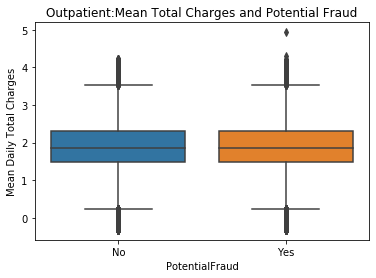

In [149]:
sns.boxplot(x='PotentialFraud', y=log_mean, \
            data=outpat_meantotal_fraud).set_title\
('Outpatient:Mean Total Charges and Potential Fraud')

In [162]:
inpat_provider_meantotalcharges = inpat1[['Provider', \
                                            'Mean Daily Total Charges']]

inpat_meantotal_fraud = pd.merge(fraud, \
                                  inpat_provider_meantotalcharges, \
                                  on='Provider')

In [163]:
inpat_meantotal_fraud = inpat_meantotal_fraud.dropna()

Text(0.5, 1.0, 'Inpatient:Mean Total Charges and Potential Fraud')

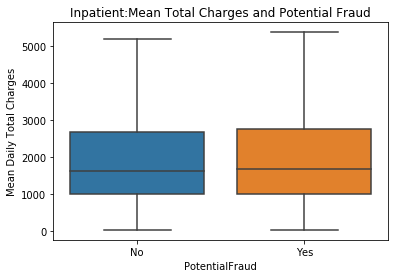

In [170]:
sns.boxplot(x='PotentialFraud', y='Mean Daily Total Charges', showfliers=False, \
            data=inpat_meantotal_fraud).set_title\
('Inpatient:Mean Total Charges and Potential Fraud')

In [165]:
log_mean_inpat = np.log10(inpat_meantotal_fraud['Mean Daily Total Charges'])

Text(0.5, 1.0, 'Inpatient:Mean Total Charges and Potential Fraud')

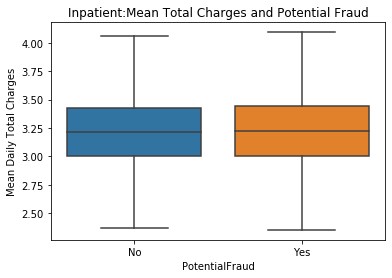

In [171]:
sns.boxplot(x='PotentialFraud', y=log_mean_inpat,showfliers=False, \
            data=inpat_meantotal_fraud).set_title\
('Inpatient:Mean Total Charges and Potential Fraud')

Text(0.5, 1.0, 'Inpatient:Mean Total Charges and Potential Fraud')

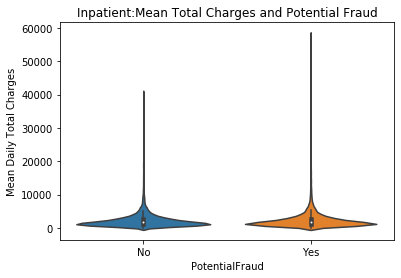

In [167]:
sns.violinplot(x='PotentialFraud', y='Mean Daily Total Charges', \
               data=inpat_meantotal_fraud).set_title\
('Inpatient:Mean Total Charges and Potential Fraud')